In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\covid 19\covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e

In [5]:
print(df.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [6]:
print(df['Country/Region'].unique())
print(df['Date'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Greenland' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Liberia' 

### checking missing values

In [7]:
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [8]:
# identify missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Province/State    34404
dtype: int64


### checking duplicate

In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Confirmed, Deaths, Recovered, Active, WHO Region]
Index: []


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].head())

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]


### Transforming and Normalizing Data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = scaler.fit_transform(df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

### feature Engineering: enhancing the dataset by creating new variables

In [12]:
# Daily Growth Rates: Create new columns for daily growth of confirmed cases, deaths, and recoveries.
df['Daily_Confirmed'] = df['Confirmed'].diff().fillna(0)
df['Daily_Deaths'] = df['Deaths'].diff().fillna(0)
df['Daily_Recovered'] = df['Recovered'].diff().fillna(0)


In [13]:
# Mortality Rate: Calculate the mortality rate as the ratio of deaths to confirmed cases.
df['Mortality_Rate'] = df['Deaths'] / df['Confirmed']

## Exploratory Data Analysis (EDA)
Trends Over Time
Analyze how the number of confirmed cases, deaths, and recoveries change over time globally or by country. Line plots can be useful here:

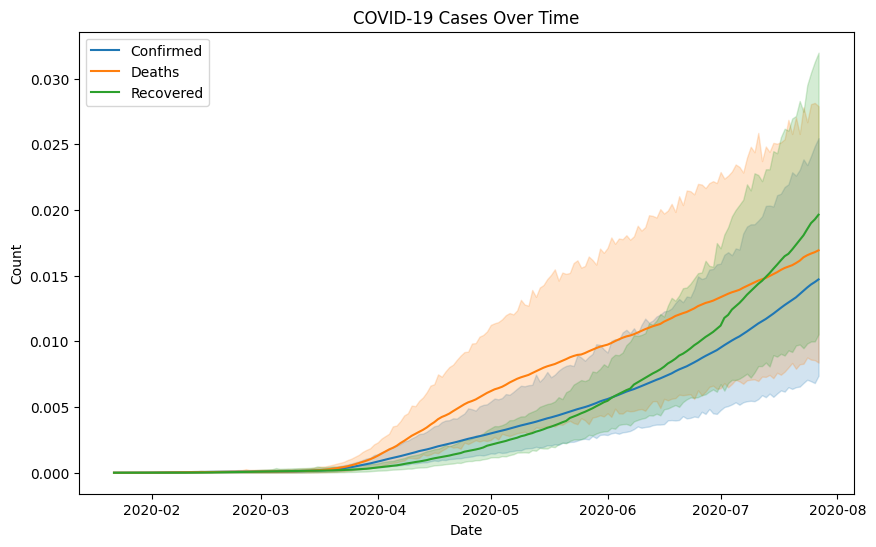

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', data=df, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=df, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=df, label='Recovered')
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

### Comparing Mortality Rates by Country
Use bar charts to visualize mortality rates across different countries:

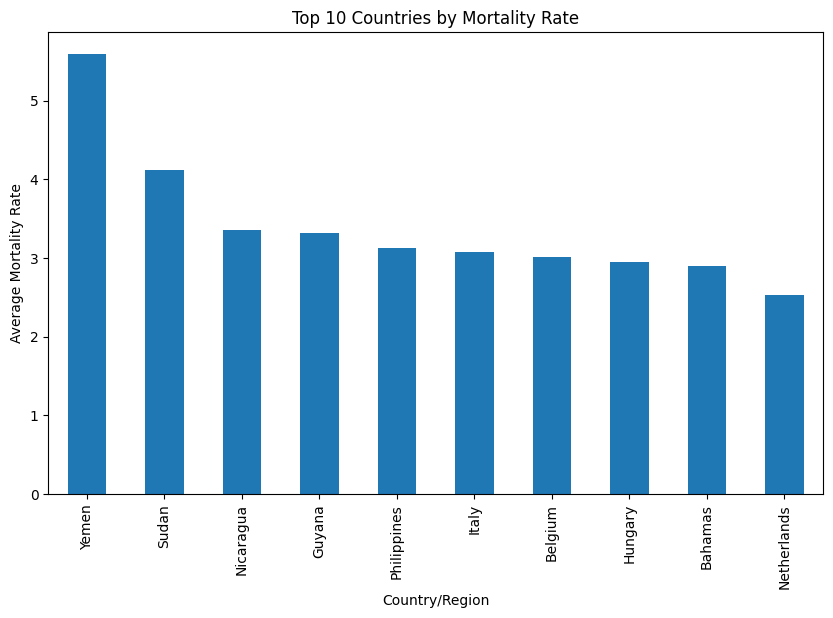

In [15]:
country_mortality = df.groupby('Country/Region')['Mortality_Rate'].mean().sort_values(ascending=False)
country_mortality.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Countries by Mortality Rate')
plt.ylabel('Average Mortality Rate')
plt.show()

### Correlations Between Variables
Explore correlations between key variables like Confirmed cases, Deaths, and Recoveries. Use heatmaps to identify significant relationships:

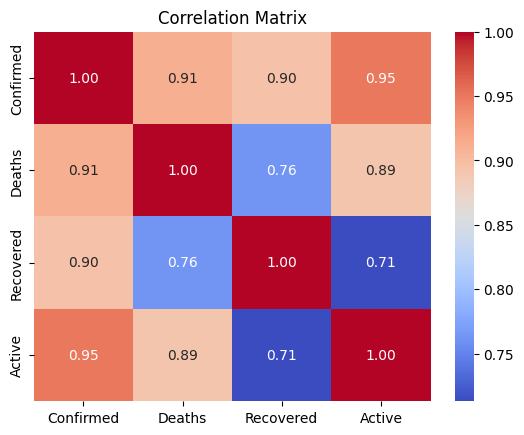

In [16]:
corr_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model Development
Time-Series Forecasting Models

Importing plotly failed. Interactive plots will not work.
22:23:31 - cmdstanpy - INFO - Chain [1] start processing
22:23:35 - cmdstanpy - INFO - Chain [1] done processing


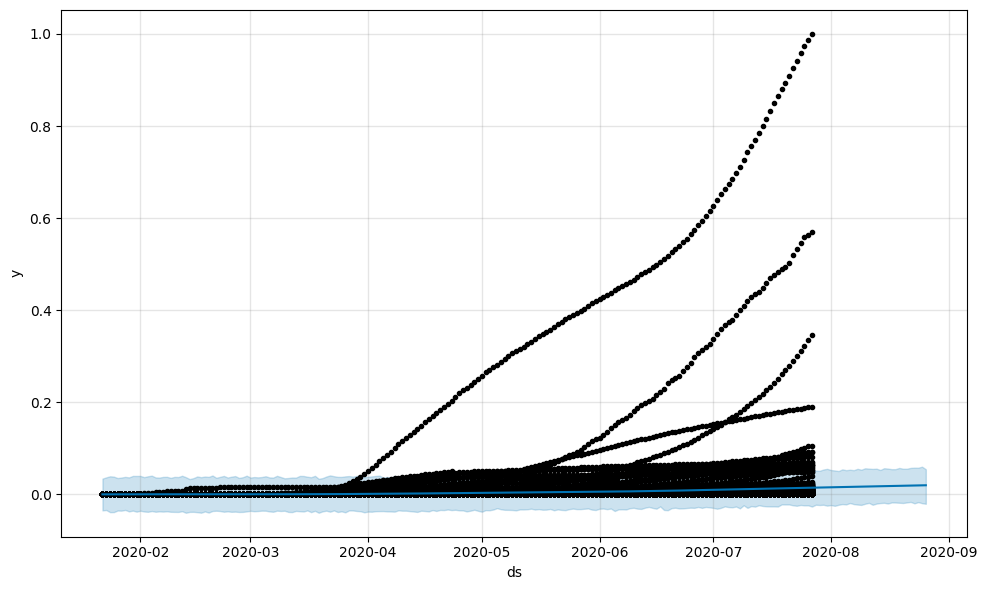

In [17]:
from prophet import Prophet
df_prophet = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)  # Predict for 30 days ahead

forecast = model.predict(future)
model.plot(forecast)
plt.show()

## Classification Models
Random Forest Classifier for predicting whether the number of confirmed cases will exceed a threshold in the future

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create target variable (e.g., 'will_exceed_threshold')
df['Will_Exceed_Threshold'] = (df['Confirmed'] > 10000).astype(int)

X = df[['Lat', 'Long', 'Active', 'Deaths', 'Recovered']]  # Features
y = df['Will_Exceed_Threshold']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9814

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



## Evaluation
Regression Models (e.g., for forecasting cases): Evaluate using RMSE or Mean Absolute Error (MAE).
Classification Models (e.g., for predicting outcomes): Use accuracy, precision, recall, F1-score.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')


RMSE: 0.0
